@44filip using https://www.kaggle.com/datasets/vijayvvenkitesh/global-land-temperatures-by-country

# Loading and cleaning data for further analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = './GlobalLandTemperaturesByCountry.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


(           dt  AverageTemperature  AverageTemperatureUncertainty Country
 0  1743-11-01               4.384                          2.294   Åland
 1  1743-12-01                 NaN                            NaN   Åland
 2  1744-01-01                 NaN                            NaN   Åland
 3  1744-02-01                 NaN                            NaN   Åland
 4  1744-03-01                 NaN                            NaN   Åland,
 None,
        AverageTemperature  AverageTemperatureUncertainty
 count       544811.000000                  545550.000000
 mean            17.193354                       1.019057
 std             10.953966                       1.201930
 min            -37.658000                       0.052000
 25%             10.025000                       0.323000
 50%             20.901000                       0.571000
 75%             25.814000                       1.206000
 max             38.842000                      15.003000)

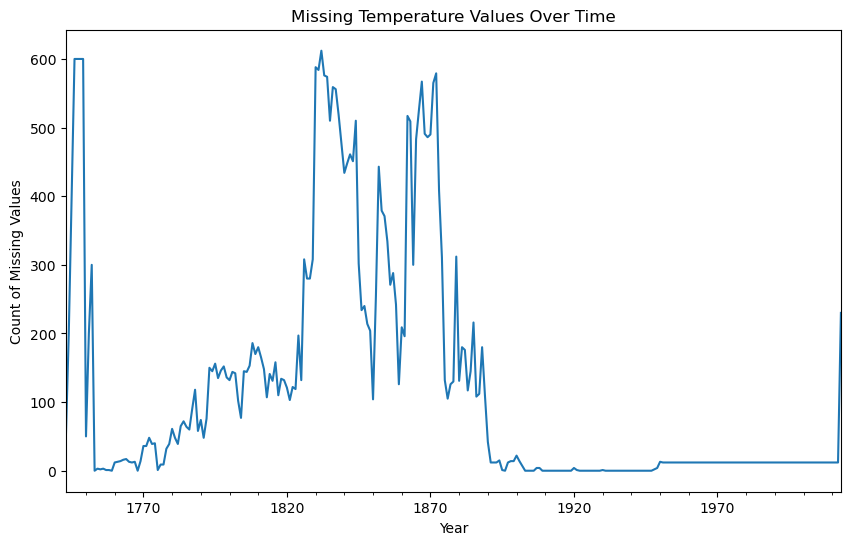

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [2]:
# Convert 'dt' column to datetime format
data['dt'] = pd.to_datetime(data['dt'])

# Check for missing values
missing_values = data.isnull().sum()

# Plot missing values over time
fig, ax = plt.subplots(figsize=(10, 6))
data.set_index('dt')['AverageTemperature'].isnull().resample('YE').sum().plot(ax=ax)
ax.set_title('Missing Temperature Values Over Time')
ax.set_ylabel('Count of Missing Values')
ax.set_xlabel('Year')
plt.show()

missing_values

In [3]:
# Filter out data prior to 1850 due to sparsity and inaccuracy
data_filtered = data[data['dt'].dt.year >= 1850]

# Check the missing data count after filtering
data_filtered.head(), data_filtered.isnull().sum()

(             dt  AverageTemperature  AverageTemperatureUncertainty Country
 1274 1850-01-01              -9.083                          1.834   Åland
 1275 1850-02-01              -2.309                          1.603   Åland
 1276 1850-03-01              -4.801                          3.033   Åland
 1277 1850-04-01               1.242                          2.008   Åland
 1278 1850-05-01               7.920                          0.881   Åland,
 dt                                   0
 AverageTemperature               12912
 AverageTemperatureUncertainty    12173
 Country                              0
 dtype: int64)

In [4]:
# Applying linear interpolation using .loc to ensure changes are properly registered
data_filtered.loc[:, 'AverageTemperature'] = data_filtered['AverageTemperature'].interpolate(method='linear')
data_filtered.loc[:, 'AverageTemperatureUncertainty'] = data_filtered['AverageTemperatureUncertainty'].interpolate(method='linear')

# Recheck the dataset to ensure the operation was successful
data_filtered.isnull().sum(), data_filtered.head()

(dt                               0
 AverageTemperature               0
 AverageTemperatureUncertainty    0
 Country                          0
 dtype: int64,
              dt  AverageTemperature  AverageTemperatureUncertainty Country
 1274 1850-01-01              -9.083                          1.834   Åland
 1275 1850-02-01              -2.309                          1.603   Åland
 1276 1850-03-01              -4.801                          3.033   Åland
 1277 1850-04-01               1.242                          2.008   Åland
 1278 1850-05-01               7.920                          0.881   Åland)

# Exploratory Data Analysis (EDA)

### Visualising temperature trends globally and country-specific over time.

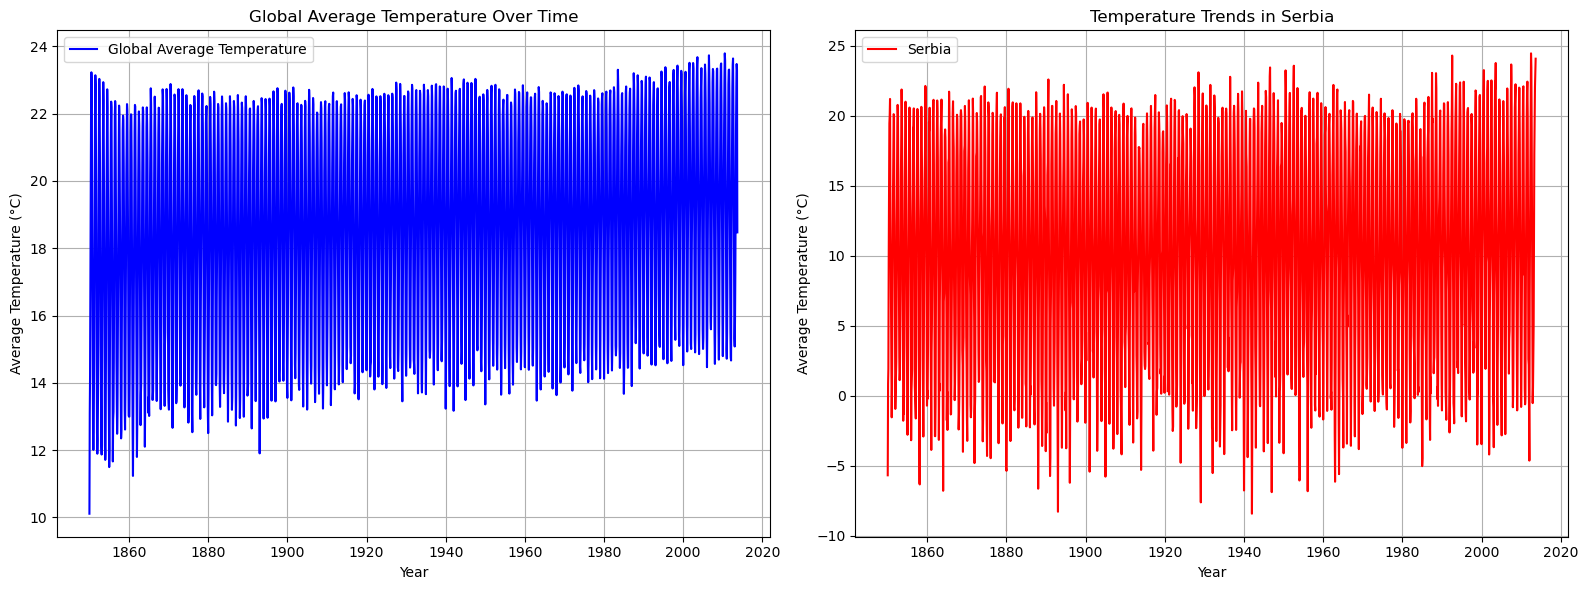

In [5]:
# Calculate Global Average Temperature per month
global_avg_temp = data_filtered.groupby('dt')['AverageTemperature'].mean()
# Filter data for Serbia
serbia_avg_temp = data_filtered[data_filtered['Country'] == 'Serbia'].groupby('dt')['AverageTemperature'].mean()

# Setting up the plots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Global Average Temperature
ax[0].plot(global_avg_temp.index, global_avg_temp, label='Global Average Temperature', color='blue')
ax[0].set_title('Global Average Temperature Over Time')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average Temperature (°C)')
ax[0].legend()
ax[0].grid(True)

# Plot for Serbia Temperature Trends
ax[1].plot(serbia_avg_temp.index, serbia_avg_temp, label='Serbia', color='red')
ax[1].set_title('Temperature Trends in Serbia')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Temperature (°C)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()



# Statistical analysis

### Calculating means, medians, variances, and other descriptive statistics for temperatures over time.

In [6]:
global_stats = global_avg_temp.describe()
print("Global Temperature Descriptive Statistics:")
print(global_stats)

Global Temperature Descriptive Statistics:
count    1965.000000
mean       18.566700
std         3.199223
min        10.111119
25%        15.523396
50%        18.872338
75%        21.612052
max        23.790383
Name: AverageTemperature, dtype: float64


In [7]:
serbia_stats = serbia_avg_temp.describe()
print("Serbia Temperature Descriptive Statistics:")
print(serbia_stats)

Serbia Temperature Descriptive Statistics:
count    1965.000000
mean       10.092554
std         8.008147
min        -8.432000
25%         2.743000
50%        10.466000
75%        17.483000
max        24.445000
Name: AverageTemperature, dtype: float64


In [8]:
# Skewness and Kurtosis
global_skewness = global_avg_temp.skew()
global_kurtosis = global_avg_temp.kurt()

print("\nAdditional Global Statistics:")
print(f"Skewness: {global_skewness}")
print(f"Kurtosis: {global_kurtosis}")

serbia_skewness = serbia_avg_temp.skew()
serbia_kurtosis = serbia_avg_temp.kurt()

print("\nAdditional Serbia Statistics:")
print(f"Skewness: {serbia_skewness}")
print(f"Kurtosis: {serbia_kurtosis}")



Additional Global Statistics:
Skewness: -0.20063012738241387
Kurtosis: -1.2968213440298337

Additional Serbia Statistics:
Skewness: -0.14590840987104378
Kurtosis: -1.2664384316441084


### Null Hypothesis (H0): There is no significant difference in the mean temperatures across the specified decades.

In [9]:
# Suppress the SettingWithCopyWarning for the next operation
pd.options.mode.chained_assignment = None

# Creating a new column 'decade' for the decade-wise segregation
data_filtered.loc[:, 'decade'] = (data_filtered['dt'].dt.year // 10) * 10

# Perform one-way ANOVA
f_value, p_value = stats.f_oneway(
    data_filtered[data_filtered['decade'] == 1850]['AverageTemperature'],
    data_filtered[data_filtered['decade'] == 1900]['AverageTemperature'],
    data_filtered[data_filtered['decade'] == 1950]['AverageTemperature'],
    data_filtered[data_filtered['decade'] == 2000]['AverageTemperature'],
    data_filtered[data_filtered['decade'] == 2010]['AverageTemperature'],
)

# Re-enable the SettingWithCopyWarning for subsequent operations
pd.options.mode.chained_assignment = 'warn'

print("ANOVA test results:")
print(f"F-Statistic: {f_value}, P-value: {p_value}")

ANOVA test results:
F-Statistic: 161.7771664801123, P-value: 2.2964765007239787e-138


F-Statistic: A value of 161.77 suggests that there is a significant difference in means between the groups (decades). \
P-Value: The p-value is extremely low (2.29e-138), indicating that the observed difference in means is highly statistically significant. \
Since the p-value is much less than the common alpha level of 0.05 (or even 0.01), we reject the null hypothesis that all group means are the same. \
However, I will check K-S and Levene's test to conclude if ANOVA assumptions are violated.

In [10]:
# Perform Kolmogorov-Smirnov test for normality for each decade
for decade in data_filtered['decade'].unique():
    temperature_data = data_filtered[data_filtered['decade'] == decade]['AverageTemperature']
    stat, p = stats.kstest(temperature_data, 'norm', args=(temperature_data.mean(), temperature_data.std()))
    print(f"K-S Test for the {decade}s: Stat={stat}, p-value={p}")

K-S Test for the 1850s: Stat=0.1541570344167723, p-value=0.0
K-S Test for the 1860s: Stat=0.1525379025844793, p-value=0.0
K-S Test for the 1870s: Stat=0.15885296482864503, p-value=0.0
K-S Test for the 1880s: Stat=0.1649954423889458, p-value=0.0
K-S Test for the 1890s: Stat=0.16284843218367406, p-value=0.0
K-S Test for the 1900s: Stat=0.16477395061726396, p-value=0.0
K-S Test for the 1910s: Stat=0.16610945340192496, p-value=0.0
K-S Test for the 1920s: Stat=0.16717557750613526, p-value=0.0
K-S Test for the 1930s: Stat=0.16612405318439527, p-value=0.0
K-S Test for the 1940s: Stat=0.16599126959331684, p-value=0.0
K-S Test for the 1950s: Stat=0.16482652104086437, p-value=0.0
K-S Test for the 1960s: Stat=0.1653427038453173, p-value=0.0
K-S Test for the 1970s: Stat=0.16626232440001154, p-value=0.0
K-S Test for the 1980s: Stat=0.16689125340816513, p-value=0.0
K-S Test for the 1990s: Stat=0.16661439387109045, p-value=0.0
K-S Test for the 2000s: Stat=0.16471740217558883, p-value=0.0
K-S Test for

In [11]:
# Check homogeneity of variance
decade_groups = [data_filtered[data_filtered['decade'] == decade]['AverageTemperature'] for decade in data_filtered['decade'].unique()]
stat, p = stats.levene(*decade_groups)
print(f"Levene’s Test: Stat={stat}, p-value={p}")

Levene’s Test: Stat=5.45086563500938, p-value=8.1532350038526e-12


In the context of hypothesis testing, the null hypothesis states that there are no differences between group means. Despite the significant F-statistic and p-value from the ANOVA, which would typically lead us to reject the null hypothesis and conclude that there are indeed differences between the decade temperature means, the violations of ANOVA assumptions mean we should be cautious with this conclusion.

In [12]:
# Perform Kruskal-Wallis test
kruskal_stats, kruskal_p = stats.kruskal(
    *[data_filtered[data_filtered['decade'] == decade]['AverageTemperature'] for decade in data_filtered['decade'].unique()]
)

print(f"Kruskal-Wallis Test: H-Statistic={kruskal_stats}, p-value={kruskal_p}")

Kruskal-Wallis Test: H-Statistic=2958.7261501984794, p-value=0.0


We can now confidently reject the null hypothesis.

# Regression analysis

### Linear regression model for global average temperatures over time.

In [13]:
# Prepare the data
X = np.array(data_filtered['dt'].dt.year).reshape(-1, 1)  # Reshape for sklearn
y = data_filtered['AverageTemperature'].values

# Create and fit the model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Print the coefficients
print(f"Coefficient: {linear_model.coef_[0]}")
print(f"Intercept: {linear_model.intercept_}")

Coefficient: 0.010661519095075093
Intercept: -2.0211916816357665


Coefficient: 0.01066. \
This value represents the estimated change in average temperature (in degrees Celsius) for each additional year.

Intercept: -2.021. \
This is the point where the regression line intercepts the y-axis of the graph. In terms of the model, it represents the predicted value of the dependent variable (in this case, average temperature) when all independent variables (in this case, time as the year) are set to zero.

The positive coefficient suggests a long-term trend of rising temperatures, which is consistent with what is generally understood about global warming. For each year, the model predicts an increase in the global average temperature of about 0.01066°C.

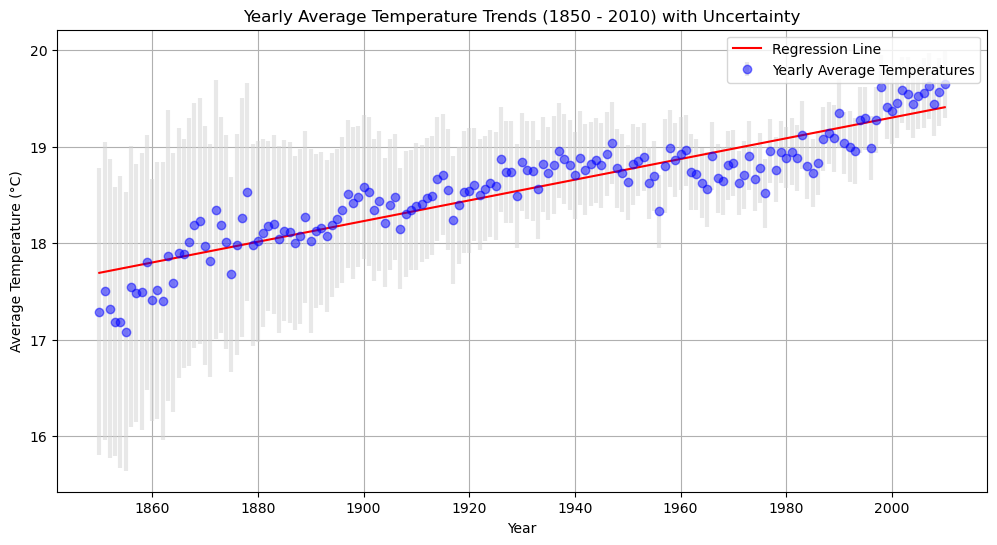

In [14]:
# Filter data within the year range and ensure no NaN values in 'AverageTemperature' and 'AverageTemperatureUncertainty'
data_reg = data_filtered[(data_filtered['dt'].dt.year >= 1850) & (data_filtered['dt'].dt.year <= 2010)]
data_reg = data_reg.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

# Calculate yearly averages and uncertainty
yearly_data = data_reg.groupby(data_reg['dt'].dt.year).agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
}).reset_index()
yearly_data.rename(columns={'dt': 'Year', 'AverageTemperature': 'YearlyAverageTemp', 'AverageTemperatureUncertainty': 'YearlyUncertainty'}, inplace=True)

# Prepare the data for regression
X = yearly_data['Year'].values.reshape(-1, 1)
y = yearly_data['YearlyAverageTemp'].values

# Create and fit the model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Generate predictions for the plot
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot = linear_model.predict(X_plot)

# Plotting
plt.figure(figsize=(12, 6))
plt.errorbar(X, y, yerr=yearly_data['YearlyUncertainty'].values, fmt='o', color='blue', label='Yearly Average Temperatures', alpha=0.5, ecolor='lightgray', elinewidth=3, capsize=0)
plt.plot(X_plot, y_plot, color='red', label='Regression Line')
plt.title('Yearly Average Temperature Trends (1850 - 2010) with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()